# ML Assignment 1

In [12]:
# Imports
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [27]:
# Functions

def extract_boxes(annotation_file):
    """ Extract bounding boxes from an annotation file"""
    
    # Load and parse the file
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    
    # Get all bounding boxes
    boxes = []
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
        
    return boxes

def draw_bounding_boxes(ax,boxes,edgecolor = 'green'):
    """ Draw bounding boxes on axis """
    for box in boxes:
        width = box[2]-box[0]
        height = box[3] - box[1]
        xmin,ymin = box[0],box[1]
        rect = patches.Rectangle((xmin,ymin),width,height, edgecolor = edgecolor, fill=False)
        ax.add_patch(rect)
    

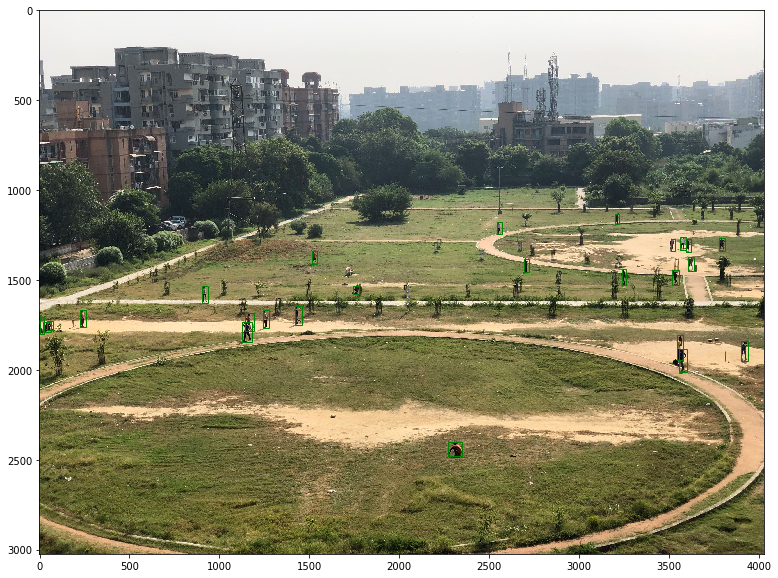

In [30]:
# Test

boxes = extract_boxes('GroundTruth.xml')
plt.rcParams["figure.figsize"] = (20,10)
image_path = 'TestImage.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
ax = plt.gca()
draw_bounding_boxes(ax,boxes)